In [1]:
from machinegnostics.models import PolynomialRegressor
import numpy as np

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and 

In [2]:
help(PolynomialRegressor)

Help on class PolynomialRegressor in module machinegnostics.models.mg_rob_reg:

class PolynomialRegressor(machinegnostics.magcal.layer_io_process_rob_rig.DataProcessRobustRegressor)
 |  PolynomialRegressor(degree: int = 2, scale: str | int | float = 'auto', max_iter: int = 100, tol: float = 1e-08, mg_loss: str = 'hi', early_stopping: bool = True, verbose: bool = False, data_form: str = 'a', gnostic_characteristics: bool = True, history: bool = True)
 |  
 |  Method resolution order:
 |      PolynomialRegressor
 |      machinegnostics.magcal.layer_io_process_rob_rig.DataProcessRobustRegressor
 |      machinegnostics.magcal.layer_io_process_base.DataProcessLayerBase
 |      machinegnostics.magcal.layer_mlflow_rob_reg.MlflowInterfaceRobustRegressor
 |      machinegnostics.magcal.layer_histroy_rob_reg.HistoryRobustRegressor
 |      machinegnostics.magcal.layer_param_rob_reg.ParamRobustRegressorBase
 |      machinegnostics.magcal.layer_param_base.ParamBase
 |      machinegnostics.magcal.lay

Iteration: 1 - Machine Gnostic loss - hi : 9.9976, rentropy: 0.5344
Iteration: 2 - Machine Gnostic loss - hi : 9.9242, rentropy: 0.3614
Iteration: 3 - Machine Gnostic loss - hi : 9.9206, rentropy: 0.3595
Iteration: 4 - Machine Gnostic loss - hi : 9.917, rentropy: 0.3575
Iteration: 5 - Machine Gnostic loss - hi : 9.9135, rentropy: 0.3555
Iteration: 6 - Machine Gnostic loss - hi : 9.9101, rentropy: 0.3536
Iteration: 7 - Machine Gnostic loss - hi : 9.907, rentropy: 0.3519
Iteration: 8 - Machine Gnostic loss - hi : 9.9044, rentropy: 0.3505
Iteration: 9 - Machine Gnostic loss - hi : 9.9024, rentropy: 0.3493
Iteration: 10 - Machine Gnostic loss - hi : 9.901, rentropy: 0.3483
Convergence reached at iteration 10 with loss/rentropy change below tolerance.


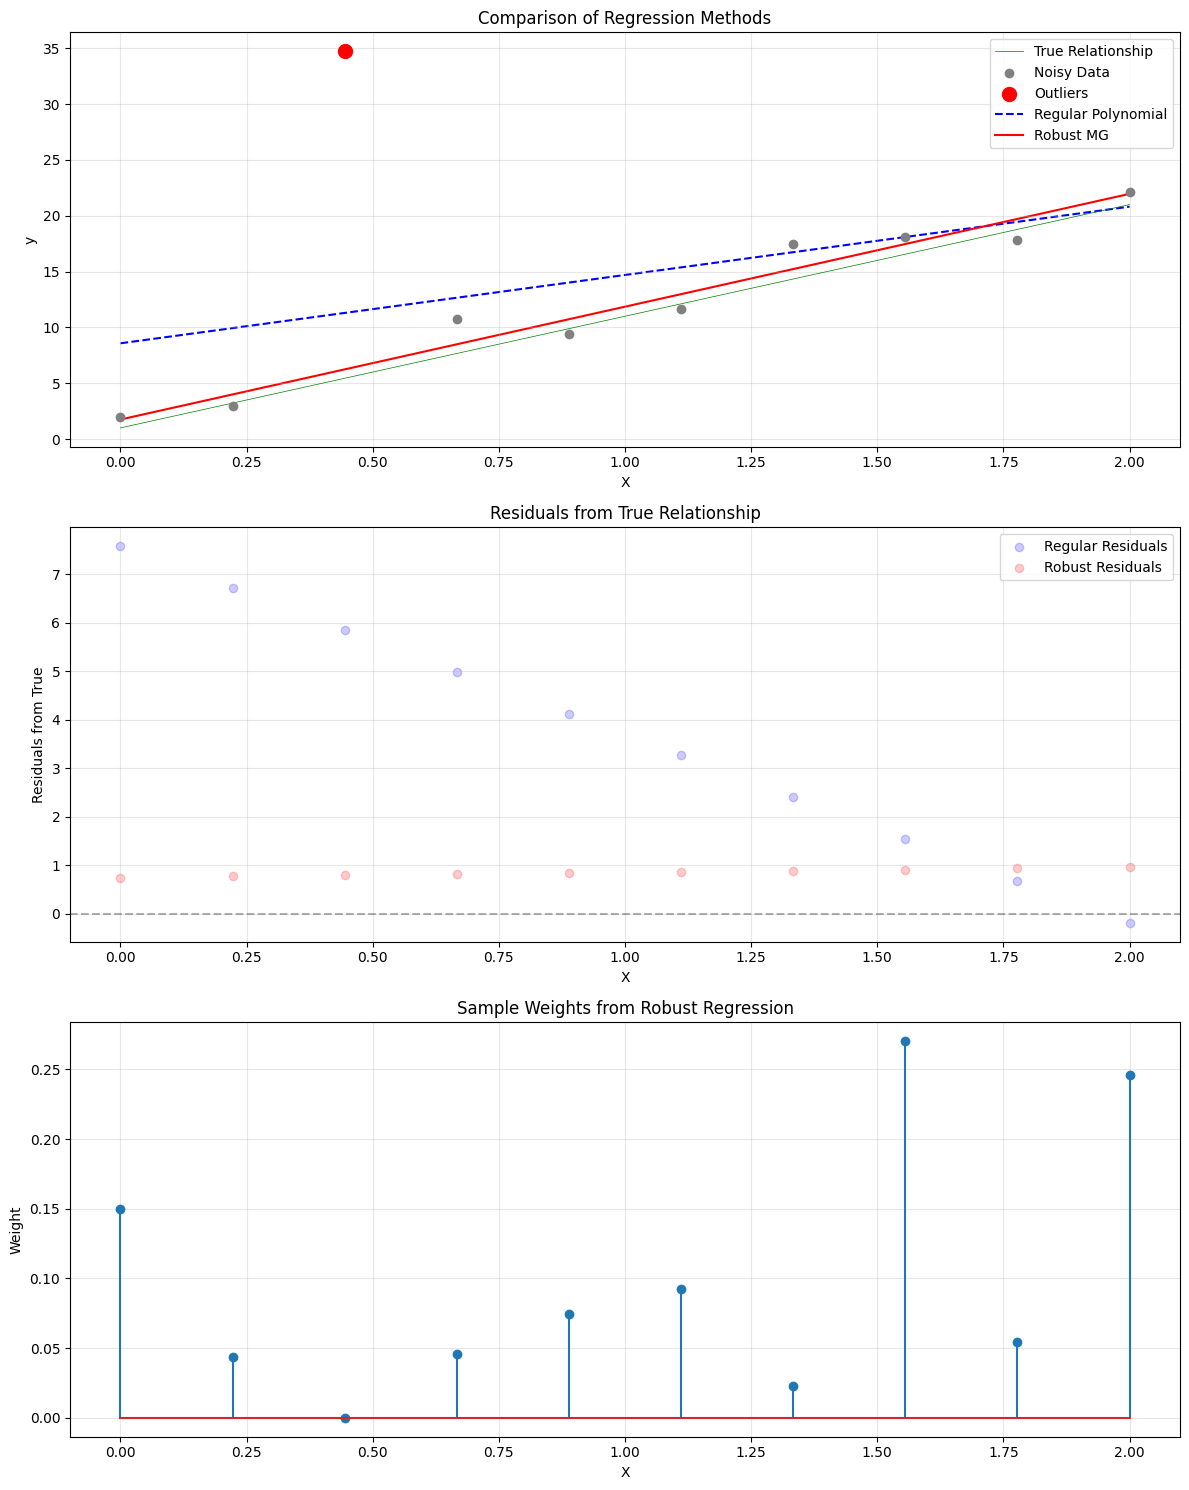

Coefficients:
True:     [1, 2]
Regular:  [0.         6.11971484]
Robust MG: [ 1.75003619 10.10506631]

MSE against true relationship (excluding outliers):
Regular Polynomial: 24.6826
Robust MG:         0.6947


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
# y_noisy[2] += [8.0]  # Add outliers
y_noisy[2] = y_noisy[2] + 28.0 

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit models
degree = 1  # Using degree 1 for linear relationship
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y_noisy)
y_pred_regular = poly_reg.predict(X)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(verbose=True, tol=1e-3, degree=1)
# mg_model = RobustRegressor(degree=1)
mg_model.fit(X, y_noisy)
y_pred_robust = mg_model.predict(X)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.2)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_model.weights, label='MG Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Robust Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:     [1, 2]")
print(f"Regular:  {poly_reg.named_steps['linearregression'].coef_}")
print(f"Robust MG: {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

Iteration: 1 - Machine Gnostic loss - hi : 9.9976, rentropy: 0.5344
Iteration: 2 - Machine Gnostic loss - hi : 9.9242, rentropy: 0.3614
Iteration: 3 - Machine Gnostic loss - hi : 9.9206, rentropy: 0.3595
Iteration: 4 - Machine Gnostic loss - hi : 9.917, rentropy: 0.3575
Iteration: 5 - Machine Gnostic loss - hi : 9.9135, rentropy: 0.3555
Iteration: 6 - Machine Gnostic loss - hi : 9.9101, rentropy: 0.3536
Iteration: 7 - Machine Gnostic loss - hi : 9.907, rentropy: 0.3519
Iteration: 8 - Machine Gnostic loss - hi : 9.9044, rentropy: 0.3505
Iteration: 9 - Machine Gnostic loss - hi : 9.9024, rentropy: 0.3493
Iteration: 10 - Machine Gnostic loss - hi : 9.901, rentropy: 0.3483
Iteration: 11 - Machine Gnostic loss - hi : 9.9002, rentropy: 0.3476
Iteration: 12 - Machine Gnostic loss - hi : 9.9001, rentropy: 0.3471
Iteration: 13 - Machine Gnostic loss - hi : 9.9005, rentropy: 0.3468
Iteration: 14 - Machine Gnostic loss - hi : 9.9013, rentropy: 0.3467
Iteration: 15 - Machine Gnostic loss - hi : 9.

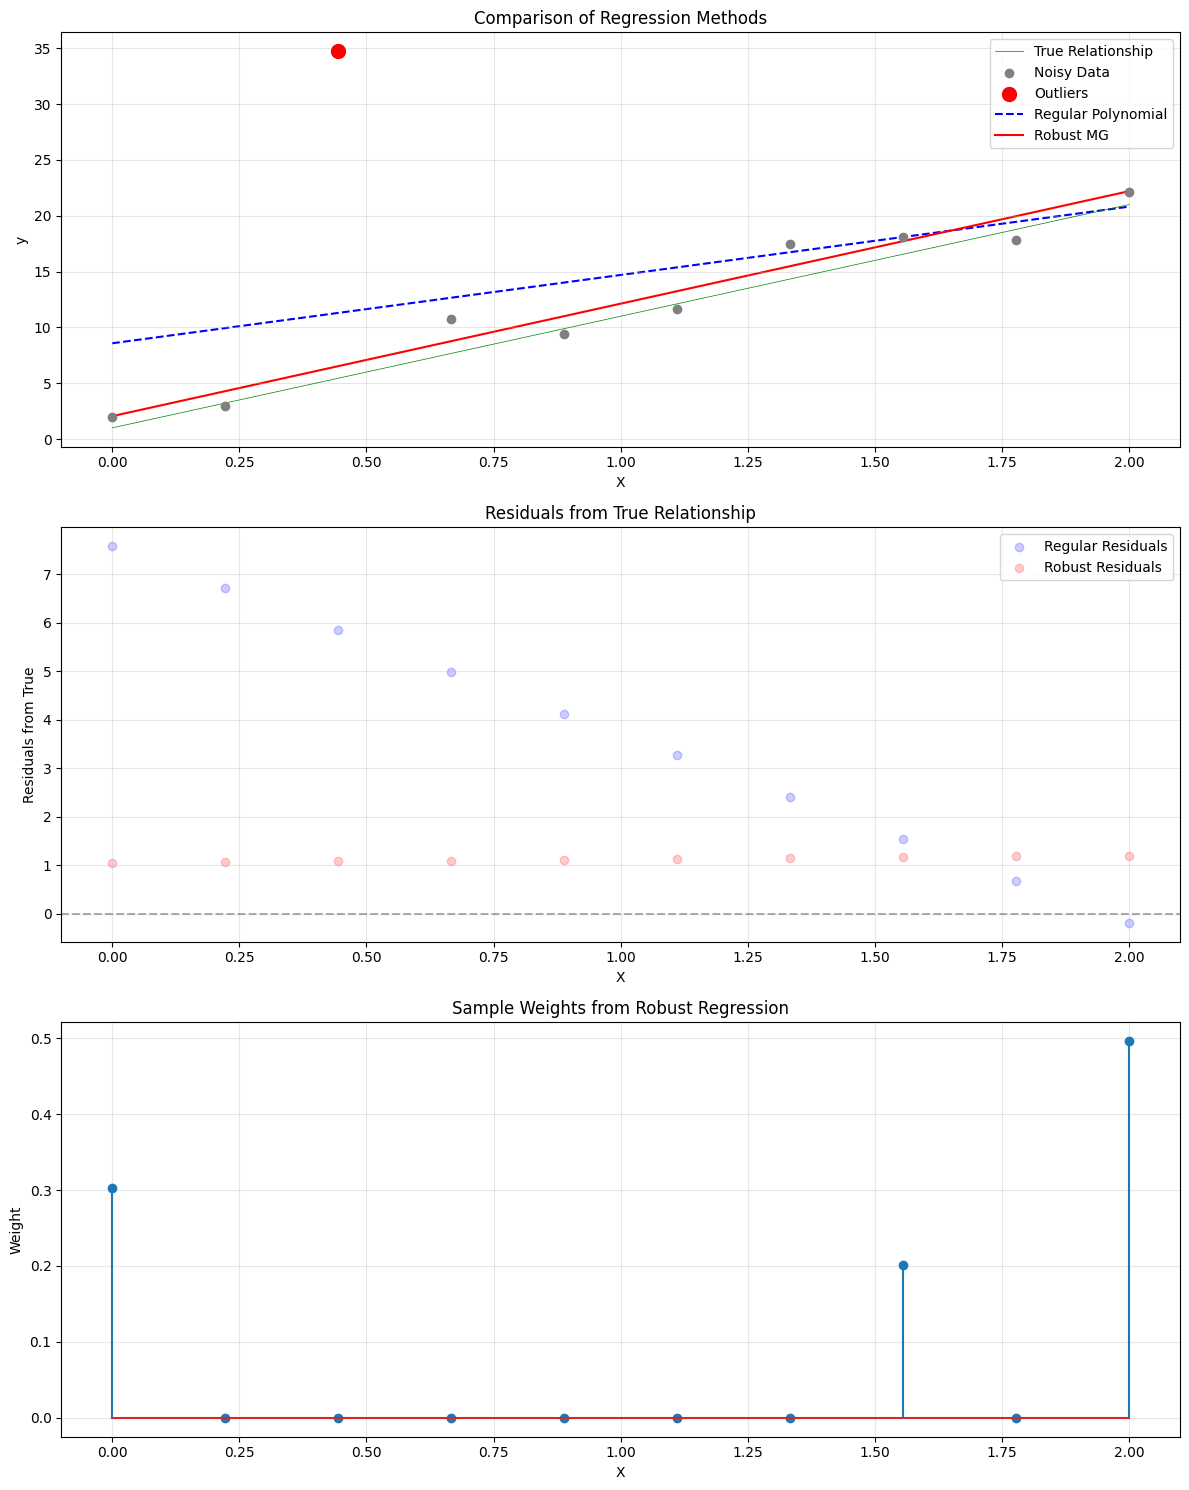

Coefficients:
True:     [1, 2]
Regular:  [0.         6.11971484]
Robust MG: [ 2.04826745 10.07708656]

MSE against true relationship (excluding outliers):
Regular Polynomial: 24.6826
Robust MG:         1.2297


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from machinegnostics.models import PolynomialRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
y_noisy[2] = y_noisy[2] + 28.0 

# Convert to pandas DataFrame
X_df = pd.DataFrame(X, columns=['feature'])
y_noisy_df = pd.DataFrame(y_noisy, columns=['target'])

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_df = pd.DataFrame(X_test, columns=['feature'])

# Fit models
degree = 1  # Using degree 1 for linear relationship
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_df, y_noisy_df.values.ravel())
y_pred_regular = poly_reg.predict(X_df)
y_pred_regular_test = poly_reg.predict(X_test_df)

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(verbose=True, tol=1e-9, degree=1, gnostic_characteristics=True)
mg_model.fit(X_df, y_noisy_df.values.ravel())
y_pred_robust = mg_model.predict(X_df)
y_pred_robust_test = mg_model.predict(X_test_df)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.2)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_model.weights, label='MG Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Robust Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:     [1, 2]")
print(f"Regular:  {poly_reg.named_steps['linearregression'].coef_}")
print(f"Robust MG: {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

In [34]:
print(mg_model._history)

[{'iteration': 2, 'h_loss': np.float64(9.997566468323281), 'coefficients': array([8.57640739, 6.11971484]), 'rentropy': np.float64(0.5343931239683128), 'weights': array([6.25082456e-02, 5.47173444e-02, 1.56874211e-05, 1.49734208e-01,
       1.07928780e-01, 1.27419531e-01, 1.14565205e-01, 1.31030631e-01,
       1.49737949e-01, 1.02342418e-01])}, {'iteration': 3, 'h_loss': np.float64(9.924247766674295), 'coefficients': array([2.40327117, 9.59511332]), 'rentropy': np.float64(0.36140628616995657), 'weights': array([7.08135844e-02, 5.31714377e-02, 5.04168900e-11, 1.38707746e-01,
       1.06481250e-01, 1.27818013e-01, 9.67727648e-02, 1.45641582e-01,
       1.44562114e-01, 1.16031507e-01])}, {'iteration': 4, 'h_loss': np.float64(9.92061344665773), 'coefficients': array([2.29632989, 9.65542402]), 'rentropy': np.float64(0.35946169752944945), 'weights': array([7.97831695e-02, 5.17250758e-02, 1.61171775e-16, 1.26817370e-01,
       1.04335295e-01, 1.27019771e-01, 8.14773921e-02, 1.60914116e-01,
  

In [35]:

print(mg_model.params)

[ParamRecord(iteration=101, h_loss=np.float64(9.920294867132643), weights=array([3.02564540e-01, 2.42283079e-05, 0.00000000e+00, 1.90036085e-11,
       8.12959751e-07, 6.66643718e-07, 4.50271571e-12, 2.01467789e-01,
       1.35652295e-11, 4.95941963e-01]), coefficients=array([ 2.04826745, 10.07708656]), degree=1, rentropy=np.float64(0.35101514785924215), fi=array([5.81178008e-02, 9.20693671e-03, 2.76099257e-01, 3.01762170e-03,
       1.07703822e-03, 7.09749753e-04, 8.52261280e-04, 4.94470400e-04,
       2.62339631e-04, 2.78053741e-04]), hi=array([-0.99830973, -0.99995762, -0.96112913, -0.99999545, -0.99999942,
       -0.99999975, -0.99999964, -0.99999988, -0.99999997, -0.99999996]), fj=array([1.72064322e+01, 1.08613758e+02, 3.62188588e+00, 3.31386800e+02,
       9.28472153e+02, 1.40894730e+03, 1.17334909e+03, 2.02236575e+03,
       3.81185258e+03, 3.59642707e+03]), hj=array([-1.71773487e+01, -1.08609155e+02, -3.48110002e+00, -3.31385291e+02,
       -9.28471615e+02, -1.40894695e+03, -1.

In [36]:
print(type(mg_model.params))  # Should be <class 'list'>
print(len(mg_model.params))   # Number of records (iterations)
print(mg_model.params[-1])    # Last record (final state)

<class 'list'>
1
ParamRecord(iteration=101, h_loss=np.float64(9.920294867132643), weights=array([3.02564540e-01, 2.42283079e-05, 0.00000000e+00, 1.90036085e-11,
       8.12959751e-07, 6.66643718e-07, 4.50271571e-12, 2.01467789e-01,
       1.35652295e-11, 4.95941963e-01]), coefficients=array([ 2.04826745, 10.07708656]), degree=1, rentropy=np.float64(0.35101514785924215), fi=array([5.81178008e-02, 9.20693671e-03, 2.76099257e-01, 3.01762170e-03,
       1.07703822e-03, 7.09749753e-04, 8.52261280e-04, 4.94470400e-04,
       2.62339631e-04, 2.78053741e-04]), hi=array([-0.99830973, -0.99995762, -0.96112913, -0.99999545, -0.99999942,
       -0.99999975, -0.99999964, -0.99999988, -0.99999997, -0.99999996]), fj=array([1.72064322e+01, 1.08613758e+02, 3.62188588e+00, 3.31386800e+02,
       9.28472153e+02, 1.40894730e+03, 1.17334909e+03, 2.02236575e+03,
       3.81185258e+03, 3.59642707e+03]), hj=array([-1.71773487e+01, -1.08609155e+02, -3.48110002e+00, -3.31385291e+02,
       -9.28471615e+02, -1.4

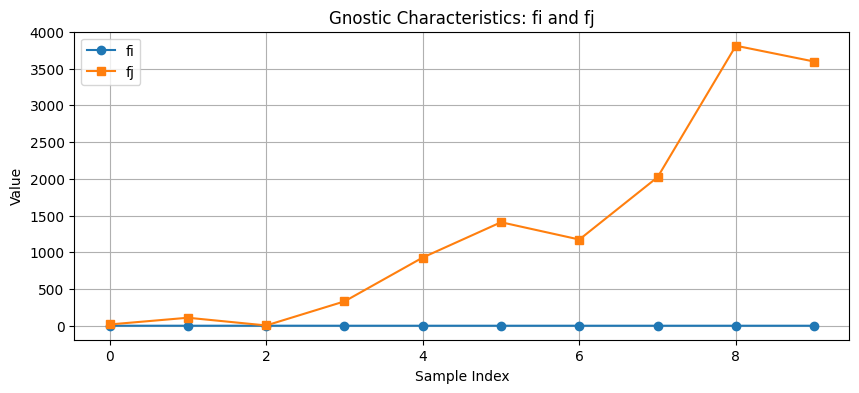

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get the last ParamRecord (final model state)
record = mg_model.params[-1]

# Plot fi and fj if they exist
if hasattr(record, 'fi') and hasattr(record, 'fj'):
    plt.figure(figsize=(10, 4))
    plt.plot(record.fi, marker='o', label='fi')
    plt.plot(record.fj, marker='s', label='fj')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title('Gnostic Characteristics: fi and fj')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("fi or fj not found in ParamRecord.")

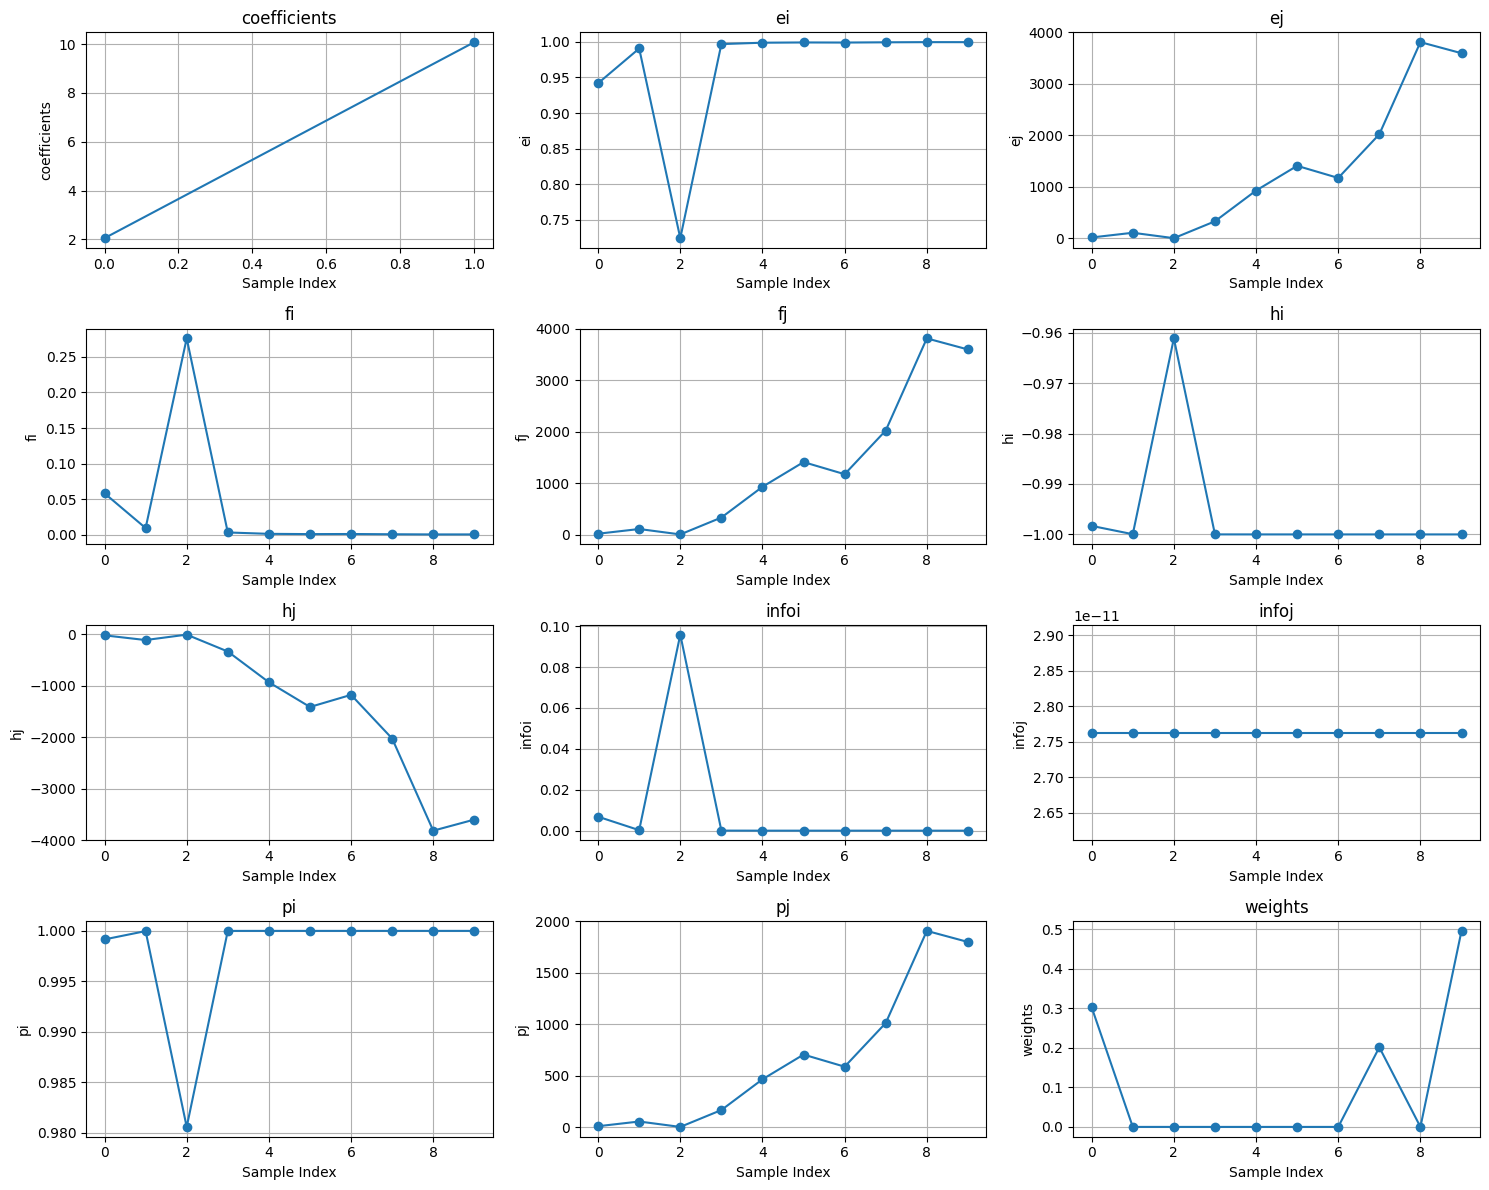

In [38]:
record = mg_model.params[-1]
array_fields = [f for f in dir(record) if not f.startswith('_') and isinstance(getattr(record, f), (np.ndarray, list))]
n = len(array_fields)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()

for i, name in enumerate(array_fields):
    arr = getattr(record, name)
    axes[i].plot(arr, marker='o')
    axes[i].set_title(name)
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel(name)
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

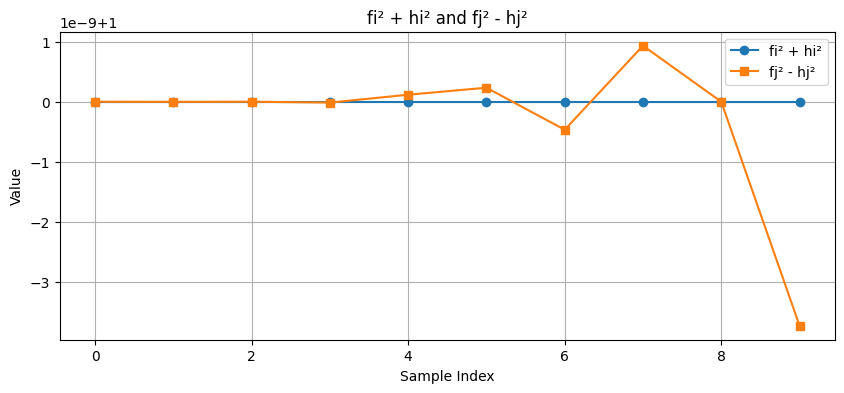

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get the last ParamRecord (final model state)
record = mg_model.params[-1]

# Ensure required attributes exist
if all(hasattr(record, attr) for attr in ['fi', 'hi', 'fj', 'hj']):
    fi2_hi2 = record.fi**2 + record.hi**2
    fj2_hj2 = record.fj**2 - record.hj**2

    plt.figure(figsize=(10, 4))
    plt.plot(fi2_hi2, marker='o', label='fi² + hi²')
    plt.plot(fj2_hj2, marker='s', label='fj² - hj²')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title('fi² + hi² and fj² - hj²')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("One or more of fi, hi, fj, hj not found in ParamRecord.")